In [1]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

0.21.0
1.14.0


In [3]:
from konlpy.tag import Twitter, Kkma, Mecab, Hannanum
t = Twitter()
kkma = Kkma()
mecab = Mecab() # mecab은 윈도우에서 사용 불가
hannanum = Hannanum()

In [4]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [5]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
# 데이터 출처 : https://github.com/akngs/petitions
petitions = pd.read_csv('data/petition.csv', index_col=0, parse_dates=['start', 'end'])
# 데이터의 크기가 어느정도인지 본다.
petitions.shape

(155844, 7)

In [6]:
petitions.head()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [7]:
petitions_content = ' '.join(str(petitions['content']))

In [8]:
from collections import Counter
counter = Counter(petitions_content)

print(counter.most_common(10))
print(len(petitions_content))

[(' ', 4694), ('.', 219), ('\n', 62), ('1', 56), ('이', 53), ('는', 50), ('7', 42), ('하', 41), ('9', 41), ('다', 40)]
7429


In [9]:
counter = Counter(petitions['content'])

print(counter.most_common(10))
print(len(petitions['content']))

[('이명박 출국금지', 597), ('이명박출국금지', 267), ('동의합니다', 124), ('출국금지', 120), ('이명박 출국 금지', 106), ('조두순 출소 반대합니다.', 105), ("[본문에 타인의 명의 등 개인정보가 무분별하게 과다하게 노출되어 본문의 내용은 홈페이지 관리자에 의해 '숨김' 처리 되었습니다.]", 101), ('조두순 출소 반대합니다', 97), ('이명박 출국금지 청원합니다', 92), ('.', 86)]
155844


In [10]:
petitions_content_kkma = kkma.sentences(petitions_content)
print(len(petitions_content_kkma))
petitions_content_kkma[:1]

16


['a r t i c l e _ i d 2 1 스 텔 라 데 이 지 호에 대 한 제 안 입 니 다 . \\ n 3 월 3 1 일 스 텔 라 데 이 지 호 가 침 몰 하 고 5 달 째 가 . . . 2 2 현 정 부에 국 민 들 이 가 장 원 하 는 것 은 부 패 척 결 입 니 다 . 우 리 사 회에 각 종 비 리 들 이 . . . 2 3 만 일 하 시 는 대 통 령 님 및 각 부 처 장 관 님 , 주 무 관 님 들 안 녕 하 세 요 ! !']

In [11]:
petitions_content_kkma = kkma.pos(petitions_content)
print(len(petitions_content_kkma))
petitions_content_kkma[:10]

2952


[('a', 'OL'),
 ('r', 'OL'),
 ('t', 'OL'),
 ('i', 'OL'),
 ('c', 'OL'),
 ('l', 'OL'),
 ('e', 'OL'),
 ('_', 'SW'),
 ('i', 'OL'),
 ('d', 'OL')]

In [12]:
petitions_content_han = hannanum.nouns(petitions_content)
print(len(petitions_content_han))
petitions_content_han[:10]

1586


['_', '2', '1', '스', '텔', '라', '데', '지', '호', '저']

In [13]:
example = petitions['content'][:1]
example

article_id
21    스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
Name: content, dtype: object

In [14]:
example = example[21]
example

'스텔라 데이지호에 대한 제안입니다.\\n3월31일 스텔라 데이지호가 침몰하고 5달째가 되고 있습니다.\\n저는 우리가 너무 일찍 포기한 것이 아닌가 하는 생각을 갖고 있습니다.\\n그리고, 추후 이 사고에 대한 확실한 해결이 없다면 나중에는 문재인 정부에 커다란 부담이 될 수도 있다는 생각에 이 글을 쓰게 되었습니다.\\n가족들이 지금까지 갖고 있는 희망은 발견되지 않은 구명벌(땟목)에 선원들이 살아있지 않을까 하는 겁니다.\\n생존 훈련받은 선원들이 대부분이고 구명벌에는 지붕과 생존도구가 구비되어있기 때문에 오랜 기간 버틸 수 있을 거라 보는 겁니다.\\n이전 정권이 대선이전에 서둘러 수색을 중단한 탓도 있고, 정권교체 후 재수색이 있었지만,\\n태평양, 3000m 수심이라는 데서, 애초 우리가 마음속에서 너무 일찍 포기한 게 아닌가 하는 생각이 듭니다.\\n멕시코에서는 14개월 동안 표류하다 구조된 어부도 있고,\\n과태말라에서 요트가 전복되어 태평양을 117일간 표류하던 어떤 부부가 한국어선에 의해 구조되는 일도 있었다는데,\\n구명벌을 찾을 때 까지 포기하면 안된다고 생각합니다.\\n구명벌이 침몰당시 분리된 것이 맞는지 확인하고,\\n선박의 침몰 원인을 찾기 위해서도 심해를 탐사할 수 있는 장비를 통한 수색도 필요하다고 생각합니다.\\n선박의 침몰에 대해서는 선사의 노후선박 개조와 사전 균열 등, 의혹이 제기되고 있는 상황입니다.\\n구명벌이 선박에서 분리되지 못했다면 구명벌 수색은 필요 없는 것이 되고 침몰원인만 확인하면 되는 것입니다.\\n물론 불가능하거나 실패할 수도 있지만 적어도 정부가 할 수 있는 모든 걸 했다는 것을 보여줘야 한다고 봅니다.\\n침몰 당시 자동발신 조난신호의 위치나 수동발신 조난신호 발생위치가 확인되고 있고, AIS나 레이다, 인공위성사진 등을 이용하면 침몰위치 특정은 어려운 것이 아니고,\\n현재 유인 심해 탐사정의 심해탐사기록이 일본 6500m, 중국 7,062m인 걸 보면 아주 불가능한 일은 아닐 수도 있다고 봅니다.\

In [15]:
# 개행문자 제거
import re
example_sub = re.sub('\\\\n', ' ', example)
example_sub

'스텔라 데이지호에 대한 제안입니다. 3월31일 스텔라 데이지호가 침몰하고 5달째가 되고 있습니다. 저는 우리가 너무 일찍 포기한 것이 아닌가 하는 생각을 갖고 있습니다. 그리고, 추후 이 사고에 대한 확실한 해결이 없다면 나중에는 문재인 정부에 커다란 부담이 될 수도 있다는 생각에 이 글을 쓰게 되었습니다. 가족들이 지금까지 갖고 있는 희망은 발견되지 않은 구명벌(땟목)에 선원들이 살아있지 않을까 하는 겁니다. 생존 훈련받은 선원들이 대부분이고 구명벌에는 지붕과 생존도구가 구비되어있기 때문에 오랜 기간 버틸 수 있을 거라 보는 겁니다. 이전 정권이 대선이전에 서둘러 수색을 중단한 탓도 있고, 정권교체 후 재수색이 있었지만, 태평양, 3000m 수심이라는 데서, 애초 우리가 마음속에서 너무 일찍 포기한 게 아닌가 하는 생각이 듭니다. 멕시코에서는 14개월 동안 표류하다 구조된 어부도 있고, 과태말라에서 요트가 전복되어 태평양을 117일간 표류하던 어떤 부부가 한국어선에 의해 구조되는 일도 있었다는데, 구명벌을 찾을 때 까지 포기하면 안된다고 생각합니다. 구명벌이 침몰당시 분리된 것이 맞는지 확인하고, 선박의 침몰 원인을 찾기 위해서도 심해를 탐사할 수 있는 장비를 통한 수색도 필요하다고 생각합니다. 선박의 침몰에 대해서는 선사의 노후선박 개조와 사전 균열 등, 의혹이 제기되고 있는 상황입니다. 구명벌이 선박에서 분리되지 못했다면 구명벌 수색은 필요 없는 것이 되고 침몰원인만 확인하면 되는 것입니다. 물론 불가능하거나 실패할 수도 있지만 적어도 정부가 할 수 있는 모든 걸 했다는 것을 보여줘야 한다고 봅니다. 침몰 당시 자동발신 조난신호의 위치나 수동발신 조난신호 발생위치가 확인되고 있고, AIS나 레이다, 인공위성사진 등을 이용하면 침몰위치 특정은 어려운 것이 아니고, 현재 유인 심해 탐사정의 심해탐사기록이 일본 6500m, 중국 7,062m인 걸 보면 아주 불가능한 일은 아닐 수도 있다고 봅니다. 애초에 사고가 발생했을 때 해수부는 국방부에 협조를 구해서 구

In [16]:
# 토큰화
example_token = example_sub.split()
example_token[:10]

['스텔라', '데이지호에', '대한', '제안입니다.', '3월31일', '스텔라', '데이지호가', '침몰하고', '5달째가', '되고']

In [17]:
example_pos = t.pos(example_sub, norm=True, stem=True)
example_pos[:10]

[('스텔라', 'Noun'),
 ('데이지', 'Noun'),
 ('호에', 'Exclamation'),
 ('대한', 'Noun'),
 ('제안', 'Noun'),
 ('이다', 'Adjective'),
 ('.', 'Punctuation'),
 ('3', 'Number'),
 ('월', 'Noun'),
 ('31', 'Number')]

In [18]:
import nltk
nltk_text = nltk.Text(example_pos, name='petition')

In [19]:
print(len(nltk_text))
print(len(nltk_text.tokens))
print(len(set(nltk_text.tokens)))

558
558
253


In [20]:
nltk_text.vocab().most_common(10)

[(('하다', 'Verb'), 30),
 (('.', 'Punctuation'), 19),
 ((',', 'Punctuation'), 17),
 (('있다', 'Adjective'), 16),
 (('이', 'Josa'), 16),
 (('에', 'Josa'), 16),
 (('되다', 'Verb'), 15),
 (('가', 'Josa'), 11),
 (('을', 'Josa'), 11),
 (('것', 'Noun'), 9)]

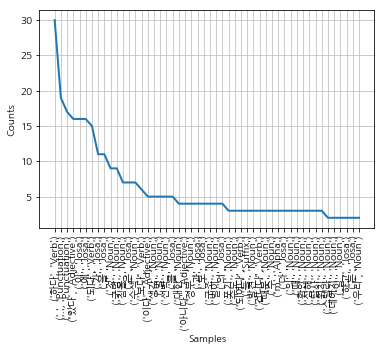

In [21]:
nltk_text.plot(50)

## 한글 불용어

* https://raw.githubusercontent.com/6/stopwords-json/master/dist/ko.json
* [Korean Stopwords](https://www.ranks.nl/stopwords/korean)
[stopwords-iso/stopwords-ko: Korean stopwords collection](https://github.com/stopwords-iso/stopwords-ko)
* https://github.com/Tkkg1994/HulkRom/blob/master/PROJECT_GT-I9505/system/opticalreader/origin/hdic/stopword.dic